## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load datasets
customers = pd.read_csv('/Users/jaini/Downloads/Customers.csv')
products = pd.read_csv('/Users/jaini/Downloads/Products.csv')
transactions = pd.read_csv('/Users/jaini/Downloads/Transactions.csv')

### Check dataset structure

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [7]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


### Data cleaning

#### Check for Missing Values:

In [9]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [10]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [11]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

No missing values present in the dataset

#### Handle Duplicates:

In [12]:
customers.duplicated().sum()

0

In [13]:
products.duplicated().sum()

0

In [14]:
transactions.duplicated().sum()

0

No duplicates found

#### Convert Datatype

In [15]:
#coverting from object datatype to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [16]:
# Verify changes
print(customers.dtypes)
print(transactions.dtypes)

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


#### Analysis

South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64


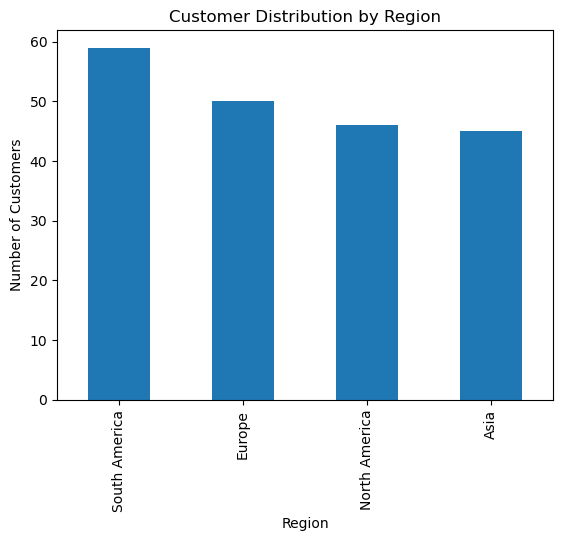

In [17]:
# Count customers by region
region_counts = customers['Region'].value_counts()
print(region_counts)

# Plot regional distribution
region_counts.plot(kind='bar', title='Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64


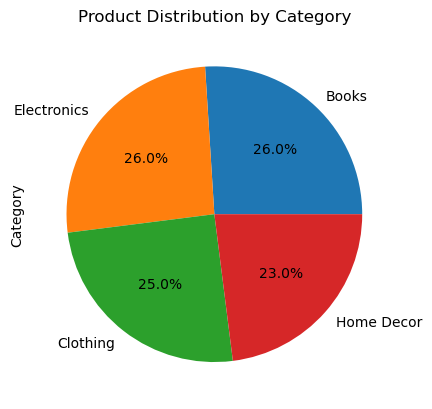

In [18]:
# Count products by category
category_counts = products['Category'].value_counts()
print(category_counts)

# Plot product category distribution
category_counts.plot(kind='pie', autopct='%1.1f%%', title='Product Distribution by Category')
plt.show()

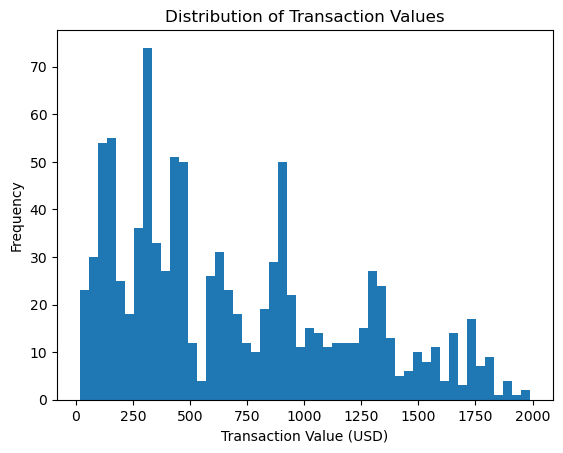

In [19]:
# Distribution of total transaction values
transactions['TotalValue'].plot(kind='hist', bins=50, title='Distribution of Transaction Values')
plt.xlabel('Transaction Value (USD)')
plt.show()

#### Multivariate Analysis

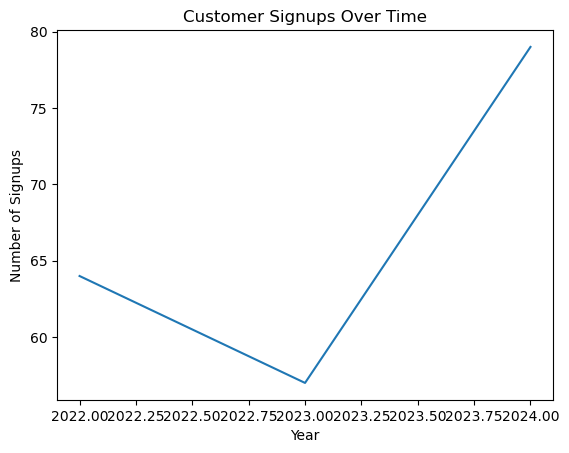

In [20]:
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers.groupby('SignupYear').size()
signup_trends.plot(kind='line', title='Customer Signups Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


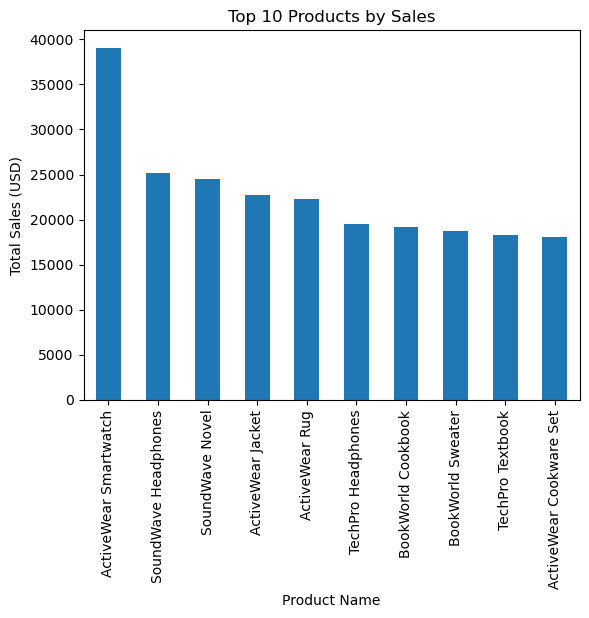

In [21]:
# Merge transactions with products
transactions_products = pd.merge(transactions, products, on='ProductID')

# Calculate total sales by product
product_sales = transactions_products.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print(product_sales.head(10))

# Plot top 10 products
product_sales.head(10).plot(kind='bar', title='Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales (USD)')
plt.show()

Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


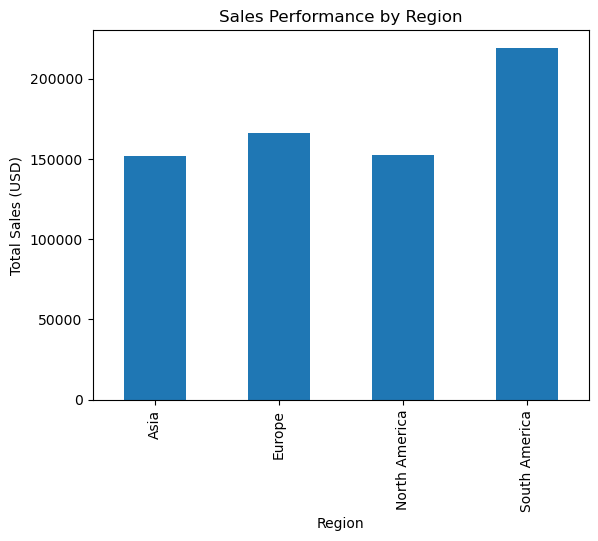

In [22]:
# Merge transactions with customers
transactions_customers = pd.merge(transactions, customers, on='CustomerID')

# Calculate sales by region
regional_sales = transactions_customers.groupby('Region')['TotalValue'].sum()
print(regional_sales)

# Plot regional sales
regional_sales.plot(kind='bar', title='Sales Performance by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()